In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

def cal_mean(frac):
    return(0.08*frac+0.15*(1-frac))

mean=list(map(cal_mean,[x/50 for x in range(51)]))
sd_mat=np.array([list(map(lambda x: math.sqrt((x**2)*0.12**2+
((1-x)**2)*0.25**2+2*x*(1-x)*(-1.5+i*0.5)*0.12*0.25),[x/50 for x in range(51)])
) for i in range(1,6)])
#[expression for variable in sequence] list comprehension

plt.plot(sd_mat[0,:],mean,label='-1')
plt.plot(sd_mat[1,:],mean,label='-0.5')
plt.plot(sd_mat[2,:],mean,label='0')
plt.plot(sd_mat[3,:],mean,label='0.5')
plt.plot(sd_mat[4,:],mean,label='1')
plt.legend(loc='upper left')
#均值與標準差在不同係數的關係圖

In [ ]:
import pandas as pd
retData = pd.read_csv('retdata.csv',sep='\t',index_col='Date')
print(retData)

retData.index = pd.to_datetime(retData.index)

retData = retData*0.01
retData.head()

# 檢視各股的累積收益率
cumreturn=(1+retData).cumprod()-1
cumreturn.plot()
plt.title('Cumulative Return of 3 Stocks(2014-2016)')
plt.legend(loc='lower center',bbox_to_anchor=(0.5,-0.3),
          ncol=5, fancybox=True, shadow=True)

# 檢視各股的回報相關性
retData=retData.dropna()

retData.corr()

In [39]:
import pandas as pd
import numpy as np

retData = pd.read_csv('retdata.csv',sep='\t',index_col='Date')

retData.index = pd.to_datetime(retData.index)
retData = retData*0.01
retData=retData.dropna()

# 設定training and testing set
train_set=retData['2014-01-01':'2015-12-31']
test_set=retData['2016']

# covariance 共變異矩陣
cov_mat=train_set.cov()
print(cov_mat)

# 收益平均值
avg_rets=train_set.mean()
print(avg_rets)

                   Hon Hai Precision  TSMC           Uni-President
Hon Hai Precision           0.000172       0.000098       0.000068
TSMC                        0.000098       0.000235       0.000082
Uni-President               0.000068       0.000082       0.000206
Hon Hai Precision    0.000551
TSMC                 0.000846
Uni-President        0.000452
dtype: float64


R:\Temp\ipykernel_3656\812357706.py:12: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  test_set=retData['2016']


In [1]:
# 設定目標收益率
# only long
import portfolioopt as pfopt
target_ret= 0.0006
weights = pfopt.markowitz_portfolio(cov_mat, avg_rets,target_ret,allow_short=False)
weights

C:\ProgramData\Anaconda3\lib\site-packages\setuptools\_importlib.py:23: UserWarning: `importlib-metadata` version is incompatible with `setuptools`.
This problem is likely to be solved by installing an updated version of `importlib-metadata`.
  warnings.warn(msg)  # Ensure a descriptive message is shown.


ModuleNotFoundError: No module named 'cvxopt'

In [41]:
# with short
target_ret = 0.15
weights = pfopt.markowitz_portfolio(cov_mat, avg_rets, target_ret,
  allow_short=True)
weights

Hon Hai Precision   -175.309001
TSMC                 423.416031
Uni-President       -247.107030
dtype: float64

In [42]:
##測試model
test_return=np.dot(test_set,
                   np.matrix(weights).T)
test_return=pd.DataFrame(test_return,index=test_set.index)
test_cum_return=(1+test_return).cumprod()-1
test_cum_return.columns = ['markowitz_portfolio']
test_cum_return.head(10)

markowitz_portfolio
Date                           
2016-01-04        -1.957118e+00
2016-01-05         3.490746e+00
2016-01-06        -2.996088e+01
2016-01-07         1.116116e+02
2016-01-08         9.595496e+02
2016-01-11         8.463678e+03
2016-01-12         2.702329e+04
2016-01-13        -1.188120e+05
2016-01-14         8.646199e+05
2016-01-15         1.797585e+07

In [43]:
# 隨機取0-1的arrary
sim_weight=np.random.uniform(0,1,(30,3))
# 將產生的數據進行normalize，使得每一個row的元素值之和為1
sim_weight_normalized =np.apply_along_axis(lambda x: x/sum(x),1,sim_weight)

In [44]:
#針對每個資產配對 計算資產組合收益率
sim_return=np.dot(test_set,np.matrix(sim_weight_normalized).T)
sim_return=pd.DataFrame(sim_return,index=test_set.index)
print(sim_return.head(3))

                  0         1         2         3         4         5   \
Date                                                                     
2016-01-04 -0.020814 -0.022130 -0.021164 -0.021747 -0.022872 -0.021610   
2016-01-05  0.000509 -0.001415 -0.000598 -0.001796 -0.004439  0.000026   
2016-01-06 -0.003284 -0.005405 -0.004748 -0.006210 -0.009531 -0.003538   

                  6         7         8         9   ...        20        21  \
Date                                                ...                       
2016-01-04 -0.021286 -0.022123 -0.022628 -0.022098  ... -0.022346 -0.021569   
2016-01-05 -0.000524 -0.003291 -0.005513 -0.003148  ... -0.002543 -0.001343   
2016-01-06 -0.004563 -0.008245 -0.011301 -0.008043  ... -0.006981 -0.005632   

                  22        23        24        25        26        27  \
Date                                                                     
2016-01-04 -0.021239 -0.020613 -0.022094 -0.020436 -0.020977 -0.021049   
2016-01-05 

In [45]:
#針對每個資產配對 計算資產的累積收益率
sim_cum_return=(1+sim_return).cumprod()-1
sim_cum_return.shape
sim_cum_return.head(1)

0        1         2         3         4        5   \
Date                                                                   
2016-01-04 -0.020814 -0.02213 -0.021164 -0.021747 -0.022872 -0.02161   

                  6         7         8         9   ...        20        21  \
Date                                                ...                       
2016-01-04 -0.021286 -0.022123 -0.022628 -0.022098  ... -0.022346 -0.021569   

                  22        23        24        25        26        27  \
Date                                                                     
2016-01-04 -0.021239 -0.020613 -0.022094 -0.020436 -0.020977 -0.021049   

                  28        29  
Date                            
2016-01-04 -0.021459 -0.022672  

[1 rows x 30 columns]

Text(0.5, 1.0, '資產組合累積收益率（Markowitz模型與 隨機配比）')

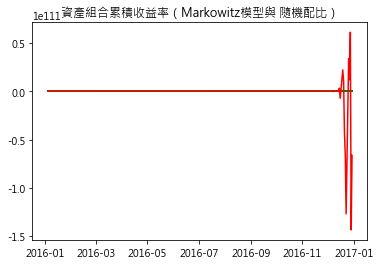

In [46]:
# 繪製累積收益圖
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

plt.plot(sim_cum_return.index,sim_cum_return,color='green')
plt.plot(test_cum_return.index,test_cum_return,color='red')
plt.title('資產組合累積收益率（Markowitz模型與 隨機配比）')

In [47]:
from scipy import linalg

In [48]:
def blacklitterman(returns,tau, P, Q):
  mu=returns.mean()
  sigma=returns.cov()
  pi1=mu
  ts = tau * sigma
  Omega = np.dot(np.dot(P,ts),P.T) * np.eye(Q.shape[0])
  middle = linalg.inv(np.dot(np.dot(P,ts),P.T) + Omega)  
  er = np.expand_dims(pi1,axis=0).T + np.dot(np.dot(np.dot(ts,P.T),middle),
                      (Q - np.expand_dims(np.dot(P,pi1.T),axis=1)))
  posteriorSigma = sigma + ts - np.dot(ts.dot(P.T).dot(middle).dot(P),ts)
  return [er, posteriorSigma]

In [49]:
# 建構資產選取矩陣 P  
pick1=np.array([1,1,0])
q1=np.array([0.0009])
pick2=np.array([1,0,-1])
q2=np.array([0.0003])
P=np.array([pick1,pick2])
Q=np.array([q1,q2])
print(P,Q)

[[ 1  1  0]
 [ 1  0 -1]] [[0.0009]
 [0.0003]]


In [50]:
# 修正後驗收益
res=blacklitterman(retData,0.1, P, Q)
p_mean=pd.DataFrame(res[0],index=retData.columns,columns=['posterior_mean'])
p_mean

posterior_mean
Hon Hai Precision        0.000492
TSMC                     0.000776
Uni-President            0.000231

In [51]:
p_cov=res[1]
p_cov


Hon Hai Precision  TSMC           Uni-President
Hon Hai Precision           0.000179       0.000100       0.000066
TSMC                        0.000100       0.000228       0.000077
Uni-President               0.000066       0.000077       0.000214

In [52]:
target_ret2 = 0.0006
cov_mat2 = res[1]
avg_rets2 = pd.Series(res[0][:,0],index=retData.columns)
weights2 = pfopt.markowitz_portfolio(cov_mat2, avg_rets2, target_ret2,
  allow_short=False)
weights2


Hon Hai Precision    0.365913
TSMC                 0.502407
Uni-President        0.131680
dtype: float64